# 4. Residual model

This notebook provides an example of building a neural net with a Residual connection. The convnet is a digit classifier.

---

We first load the MNIST data

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We preprocess the image as previously

In [2]:
from utils import preprocess

train_images = preprocess(train_images)
test_images = preprocess(test_images)

We also need to one-hot encode the labels

In [3]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
layers.MaxPooling2D?

Object `layers.MaxPooling2D` not found.


We can construct our neural net with residual module

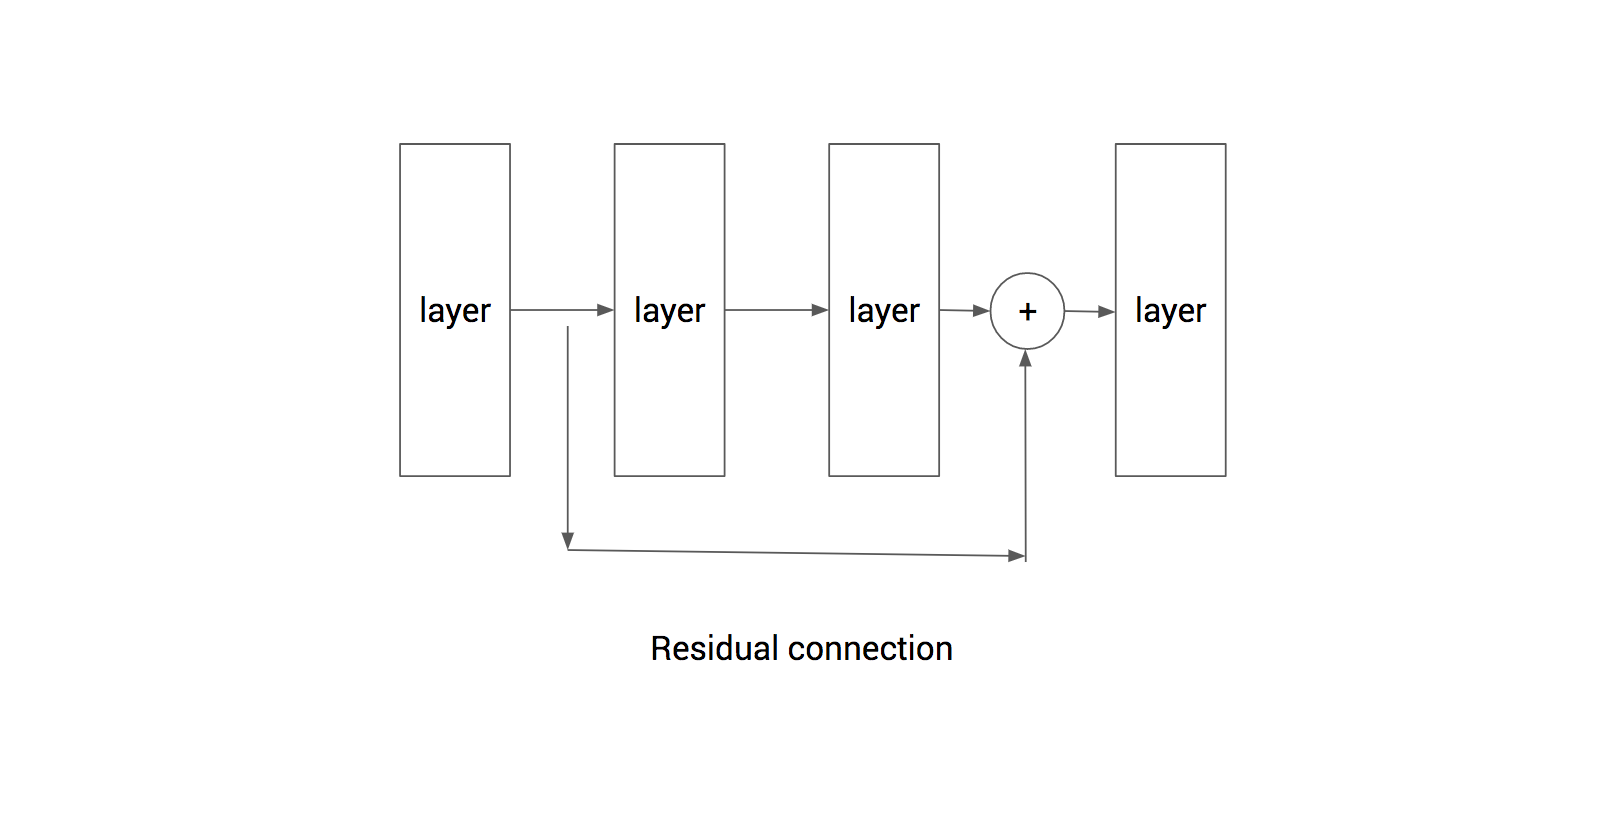

In [5]:
from IPython.display import Image
Image('residual.png')

In [5]:
from keras import layers
from keras import Input
from keras.models import Model


inputs = Input(shape=(28, 28, 1))

x = layers.Conv2D(32, 3, activation='relu')(inputs)

y = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(32, 3, activation='relu', padding='same')(y)
y = layers.MaxPooling2D(2)(y)

# we use a 1x1 convolution to linearly downsample
# the original `x` tensor to the same shape as `y`
residual = layers.Conv2D(32, 1, strides=2)(x)

# add the residual tensor back to the output features
y = layers.add([y, residual])

# add dense layers
output = layers.Flatten()(y)
output = layers.Dense(64, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)

Instantiate the model and compile the model

In [6]:
model = Model(inputs, output)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train model

In [7]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
60000/60000 [==============================] - 254s - loss: 0.1280 - acc: 0.9612   
Epoch 2/3
60000/60000 [==============================] - 262s - loss: 0.0404 - acc: 0.9872   
Epoch 3/3
60000/60000 [==============================] - 261s - loss: 0.0257 - acc: 0.9921   


Test model

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 12s    


In [9]:
test_acc

0.99050000000000005